In [150]:
# DHCNTT17A
# 22643441
# author: Lê Vũ Thanh Dương

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
# 1. Đọc dữ liệu lên dataframe
thietbi = pd.read_csv('thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')

In [83]:
# 3. Đổi tên các cột dữ liệu cần thiết
thietbi.rename(columns={'Retail Branding': 'Branding', 'Marketing Name': 'MarketingName'}, inplace=True)
thietbi.head()

,Branding,MarketingName,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [ ]:
# 4. Trộn bảng nguoidung_sudung và nguoidung_thietbi thông qua inner join để được bảng 
# kết quả có các cột sau: [outgoing_mins_per_month, outgoing_sms_per_month, 
# monthly_mb, use_id, platform, device]
dfKetQua = pd.merge(nguoidung_sudung, nguoidung_thietbi[['use_id','platform', 'device']], on='use_id', how='left')
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [59]:
# 5. Tiếp tục inner-join bảng thietbi và dfKetQua để có thêm 2 cột Model và Branding trong 
# bảng kết quả cuối cùng. Lưu ý ở đây khóa liên kết sẽ khác tên
dfKetQua = pd.merge(dfKetQua, thietbi[['Branding', 'Model']], left_on='device', right_on='Model', how='left')
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F


In [84]:
# 6. Hãy liệt kê 5 dòng đầu tiên các mẫu thiết bị (cột device) bắt đầu bằng GT
dfKetQua['device'].fillna('Unknown', inplace=True)
dfKetQua[dfKetQua.device.str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
9,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
11,189.10,24.08,519.12,22805,android,GT-I9195,Samsung,GT-I9195
31,85.97,26.94,407.01,22831,android,GT-I8190N,Samsung,GT-I8190N
56,29.54,34.78,33.79,22871,android,GT-I9300,Samsung,GT-I9300


In [ ]:
# 7. Hãy thống kê trung bình số phút hàng tháng, trung bình sms và trung bình data, số lượng 
# sử dụng của các nhãn hàng
dfKetQua.groupby('Branding').agg({'outgoing_mins_per_month':'mean', 'outgoing_sms_per_month': 'mean', 'monthly_mb': 'mean', 'use_id': 'count'})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


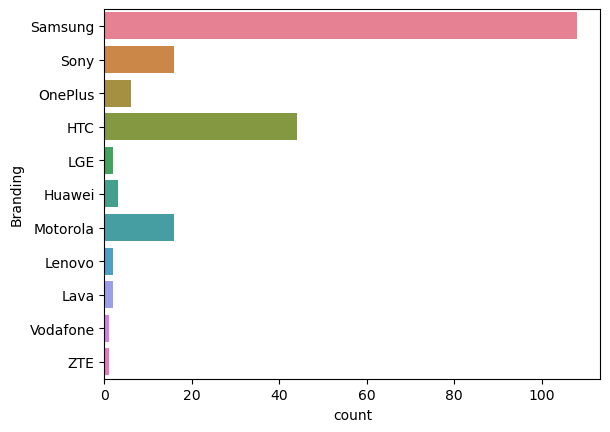

In [102]:
# 8. Trực quan số lượng người dùng các nhãn hàng
sns.countplot(y= 'Branding', data=dfKetQua, hue='Branding', legend=False)
plt.show()

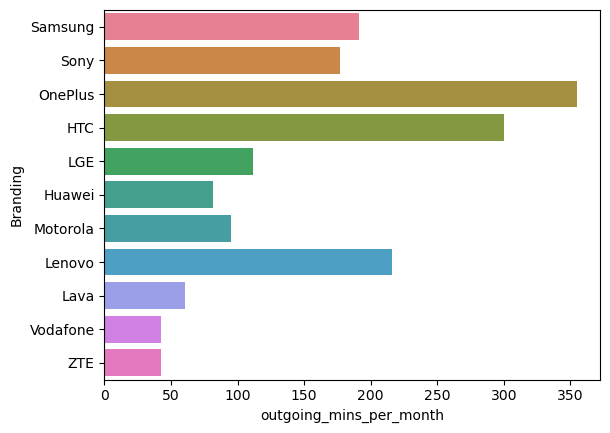

In [103]:
# 9. Trực quan hóa dữ liệu trung bình phút gọi, trung bình sms và dung lượng sử dụng trên 
# từng nhóm nhãn hàng bán lẻ
sns.barplot(y='Branding', x='outgoing_mins_per_month', data=dfKetQua, hue='Branding', estimator=np.mean, errorbar=None, legend=False)
plt.show()

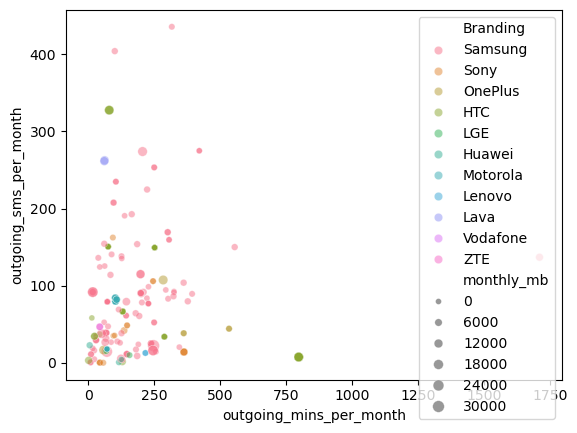

In [99]:
# 10. Khảo sát tương quan giữa phút gọi, sms và dung lượng trên từng nhóm nhãn hàng
sns.scatterplot(x='outgoing_mins_per_month', y='outgoing_sms_per_month', data=dfKetQua, hue='Branding', size='monthly_mb', alpha=0.5)
plt.show()

In [115]:
# 11. Hãy kiểm định xem trung bình outgoing_mins_per_month có bằng 200 phút
import scipy.stats as stats
stats.ttest_1samp(dfKetQua['outgoing_mins_per_month'], popmean=200)

TtestResult(statistic=4.043062626787007, pvalue=6.761075437018016e-05, df=291)

In [116]:
print('Không đủ bằng chứng để khẳng định trung bình outgoing_mins_per_month bằng 200 phút')

Không đủ bằng chứng để khẳng định trung bình outgoing_mins_per_month bằng 200 phút


In [117]:
# 12. Hãy kiểm định xem trung bình outgoing_sms_per_month có bằng 100 tin nhắn
stats.ttest_1samp(dfKetQua['outgoing_sms_per_month'], popmean=100)

TtestResult(statistic=-0.8657558154979389, pvalue=0.38733728270394974, df=291)

In [118]:
print('Không đủ bằng chứng để bác bỏ trung bình outgoing_sms_per_month bằng 100 tin nhắn')

Không đủ bằng chứng để bác bỏ trung bình outgoing_sms_per_month bằng 100 tin nhắn


In [119]:
# 13. Hãy kiểm định xem trung bình monthly_mb có bằng 2048 mb
stats.ttest_1samp(dfKetQua['monthly_mb'], popmean=2048)

TtestResult(statistic=6.270337979876716, pvalue=1.298354665712386e-09, df=291)

In [122]:
print('Không đủ bằng chứng để khẳng định trung bình monthly_mb bằng 2048 mb')

Không đủ bằng chứng để khẳng định trung bình monthly_mb bằng 2048 mb


In [124]:
# 14. Hãy tạo ma trận tương quan giữa [outgoing_mins_per_month, outgoing_sms_per_month, 
# monthly_mb] và sắp xếp tăng dần về mức độ tương quan
dfCorr = dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb']].corr()
dfCorr.unstack().sort_values().drop_duplicates()
print(dfCorr)


                         outgoing_mins_per_month  outgoing_sms_per_month  \
outgoing_mins_per_month                 1.000000                0.108519   
outgoing_sms_per_month                  0.108519                1.000000   
monthly_mb                              0.117056               -0.072870   

                         monthly_mb  
outgoing_mins_per_month    0.117056  
outgoing_sms_per_month    -0.072870  
monthly_mb                 1.000000  


In [139]:
# 15. Kiểm định xem outgoing_mins_per_month, outgoing_sms_per_month có tương quan với nhau không
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(dfKetQua['outgoing_mins_per_month'], dfKetQua['outgoing_sms_per_month'])
print("Hệ số tương quan Pearson:", correlation_coefficient)
print("P-value:", p_value)
alpha = 0.05  # Mức ý nghĩa
if p_value < alpha:
    print("Hai biến outgoing_mins_per_month và outgoing_sms_per_month có tương quan.")
else:
    print("Không thể kết luận hai biến outgoing_mins_per_month và outgoing_sms_per_month có tương quan.")

Hệ số tương quan Pearson: 0.10851853963490199
P-value: 0.06404245105516108
Không thể kết luận hai biến outgoing_mins_per_month và outgoing_sms_per_month có tương quan.


In [140]:
# 16. Hãy kiểm định xem có mối quan hệ nào giữa platform và branding
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(dfKetQua['platform'], dfKetQua['Branding'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)
alpha = 0.05  # Mức ý nghĩa
if p < alpha:
    print("Có mối quan hệ đáng kể về thống kê giữa platform và branding.")
else:
    print("Không có đủ bằng chứng để kết luận có mối quan hệ giữa platform và branding.")

Chi-square statistic: 0.0
P-value: 1.0
Không có đủ bằng chứng để kết luận có mối quan hệ giữa platform và branding.


In [141]:
# 17. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform
contingency_table = pd.crosstab(dfKetQua['platform'], dfKetQua['monthly_mb'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)
alpha = 0.05  # Mức ý nghĩa
if p < alpha:
    print("Có mối quan hệ đáng kể về thống kê giữa platform và monthly_mb.")
else:
    print("Không có đủ bằng chứng để kết luận có mối quan hệ giữa platform và monthly_mb.")

Chi-square statistic: 210.99999999999997
P-value: 2.0134303045850425e-27
Có mối quan hệ đáng kể về thống kê giữa platform và monthly_mb.


In [142]:
# 18. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform theo loại branding
contingency_table = pd.crosstab(dfKetQua['platform'], dfKetQua['monthly_mb'], values=dfKetQua['Branding'], aggfunc='count')
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)
alpha = 0.05  # Mức ý nghĩa
if p < alpha:
    print("Có mối quan hệ đáng kể về thống kê giữa platform và monthly_mb theo loại branding.")
else:
    print("Không có đủ bằng chứng để kết luận có mối quan hệ giữa platform và monthly_mb theo loại branding.")


Chi-square statistic: nan
P-value: nan
Không có đủ bằng chứng để kết luận có mối quan hệ giữa platform và monthly_mb theo loại branding.


In [145]:
# 19. Phân tích sự ảnh hưởng của outgoing_mins_per_month, outgoing_sms_per_month đến 
# monthly_mb dựa trên mô hình hồi quy tuyến tính
import statsmodels.api as sm
X = dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month']]
y = dfKetQua['monthly_mb']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

intercept = model.params['const']
coef_mins = model.params['outgoing_mins_per_month']
coef_sms = model.params['outgoing_sms_per_month']

print(f"Phương trình hồi quy: y = {intercept:.2f} + {coef_mins:.2f} * outgoing_mins_per_month + {coef_sms:.2f} * outgoing_sms_per_month")


Phương trình hồi quy: y = 3567.51 + 2.09 * outgoing_mins_per_month + -3.89 * outgoing_sms_per_month


In [149]:
# 20. Dựa trên mô hình hồi quy tuyến tính hãy cho biết nếu outgoing_mins_per_month, 
# outgoing_sms_per_month lần lượt là 50 phút, 75 tin nhắn thì tháng đó người dùng sẽ tiêu 
# hao bao nhiêu dung lượng internet (mb) cho quá trình sử dụng. 
# (*) Lưu ý: Sinh viên xây dựng chương trình phần mềm hoàn chỉnh dạng Console 
# Application với Input là outgoing_mins_per_month, outgoing_sms_per_month và output 
# là giá trị monthly_mb dự báo được

import statsmodels.formula.api as sm

try:
    dfKetQua
except NameError:
    print("Error: dfKetQua not found. Please run the data loading and preprocessing code first.")
    exit()
model = sm.ols('monthly_mb ~ outgoing_mins_per_month + outgoing_sms_per_month', data=dfKetQua).fit()

while True:
    try:
        outgoing_mins = float(input("Enter outgoing minutes per month: "))
        outgoing_sms = float(input("Enter outgoing SMS per month: "))
        break
    except ValueError:
        print("Invalid input. Please enter numeric values.")

predicted_mb = model.params[0] + model.params[1] * outgoing_mins + model.params[2] * outgoing_sms

print(f"Predicted monthly MB usage: {predicted_mb:.2f} MB")


Predicted monthly MB usage: 3380.51 MB


C:\Users\DUONG\AppData\Local\Temp\ipykernel_19240\4138689244.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_mb = model.params[0] + model.params[1] * outgoing_mins + model.params[2] * outgoing_sms


In [ ]:
1